In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import json
import matplotlib.pyplot as plt
import os
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from scipy import optimize
import picaso.justdoit as jdi


from analyze import *

# Load and Plot your Data

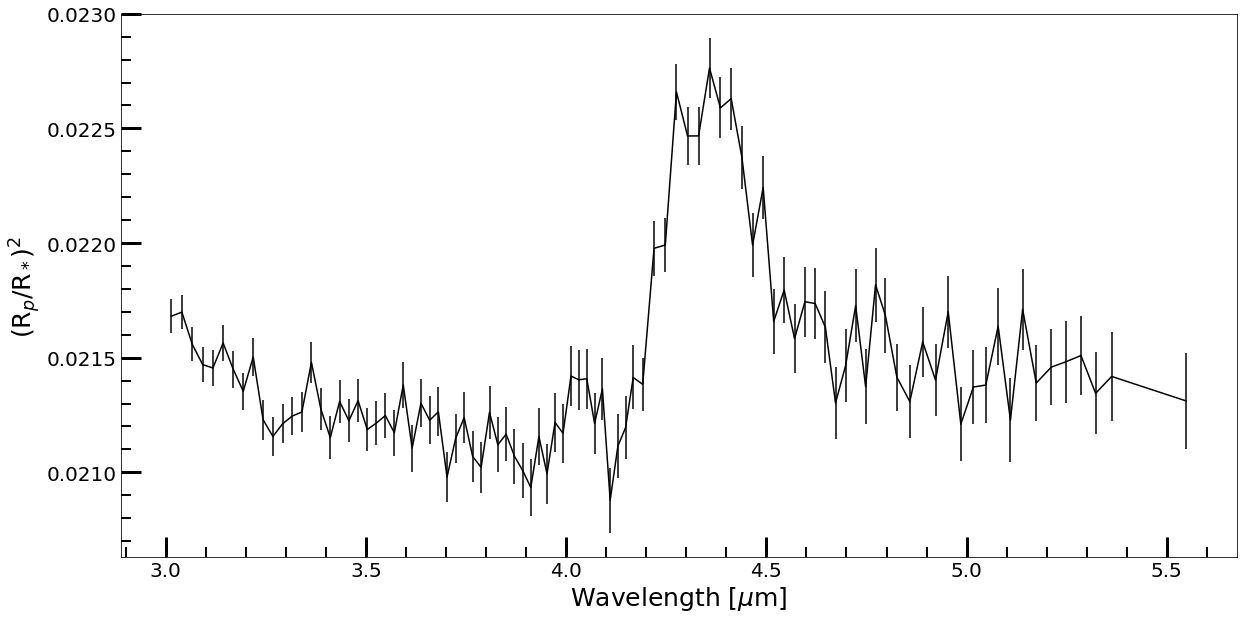

In [9]:
#path = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/data"
#wlgrid_center,rprs_data2,e_rprs2_pos,e_rprs2_neg,wlgrid_width = np.loadtxt(path+"/S6_template_ap6_bg10_Table_Save.txt",usecols=[0,2,3,4,1],unpack=True)
#e_rprs2 = 0.5*(e_rprs2_pos+e_rprs2_neg)

#

#reduction_name = "Tshirt NIRCAM"

path = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/"

wlgrid_center,rprs_data2,e_rprs2,wlgrid_width = np.loadtxt(path+"data/w39_prism_firefly_trans_spec_20jul2022.txt",usecols=[0,1,2,3],unpack=True,skiprows=1)

wh =  np.where(wlgrid_center < 3.0)

wlgrid_center = np.delete(wlgrid_center,wh[0])
rprs_data2 = np.delete(rprs_data2,wh[0])
e_rprs2 = np.delete(e_rprs2,wh[0])

reduction_name = "Firefly"



#path = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/"

#df_data = pd.read_csv(path+"data/spectrum_lc_fit_wasp39_spec_p007_groupdq_skipjump_SB_superbias_INT_TIMES.csv")
#wlgrid_center,rprs_data2,e_rprs2,wlgrid_width = df_data['wave'].values,df_data['depth'].values,df_data['depth err'].values, 0
#reduction_name = "Tshirt"

plt.figure(figsize=(20,10))
plt.errorbar(wlgrid_center,rprs_data2,e_rprs2,color="k")
plt.xlabel(r"Wavelength [$\mu$m]",fontsize=25)
plt.ylabel(r"(R$_p$/R$_*$)$^2$",fontsize=25)
plt.minorticks_on()
plt.tick_params(axis='y',which='major',length =20, width=3,direction='in',labelsize=20)
plt.tick_params(axis='y',which='minor',length =10, width=2,direction='in',labelsize=20)
plt.tick_params(axis='x',which='major',length =20, width=3,direction='in',labelsize=20)
plt.tick_params(axis='x',which='minor',length =10, width=2,direction='in',labelsize=20)


# Load and Fit every grid you have

Please remember to update the folder locations , numparams for your grid.

In [10]:
numparams=5
grid = "Picaso"
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cld_free"

rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra_grid,temperature_grid,pressure_grid,fsed,filename_arr = read_parameter_space_models(grid,location,grid_dimensions=True,Verbose=True)
chi_sq_pi,Tint_pi,mh_pi,cto_pi,heat_redis_pi,logkzz_pi,pquench_pi,p_cloud_pi,haze_eff_pi,rainout_pi,wavelength_pi,spectra_pi,spectra_bf_pi,temperature_bf_pi,pressure_bf_pi,fsed_pi,filename_pi,offset_pi=fit_grid(grid,location,wlgrid_center,wlgrid_width,rprs_data2,e_rprs2,numparams,rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra_grid,temperature_grid,pressure_grid,fsed,filename_arr)


numparams=7
grid = "Picaso_cld"
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cldy"

rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra_grid,temperature_grid,pressure_grid,fsed,filename_arr=rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra,temperature,pressure,fsed,filename_arr = read_parameter_space_models(grid,location,grid_dimensions=True,Verbose=True)
chi_sq_picld,Tint_picld,mh_picld,cto_picld,heat_redis_picld,logkzz_picld,pquench_picld,p_cloud_picld,haze_eff_picld,rainout_picld,wavelength_picld,spectra_picld,spectra_bf_picld,temperature_bf_picld,pressure_bf_picld,fsed_picld,filename_picld,offset_cld=fit_grid(grid,location,wlgrid_center,wlgrid_width,rprs_data2,e_rprs2,numparams,rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra_grid,temperature_grid,pressure_grid,fsed,filename_arr)


numparams=5
grid = "Picaso_deq"
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cld_free_photo"

rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra_grid,temperature_grid,pressure_grid,fsed,filename_arr = read_parameter_space_models(grid,location,grid_dimensions=True,Verbose=True)
chi_sq_piph,Tint_piph,mh_piph,cto_piph,heat_redis_piph,logkzz_piph,pquench_piph,p_cloud_piph,haze_eff_piph,rainout_piph,wavelength_piph,spectra_piph,spectra_bf_piph,temperature_bf_piph,pressure_bf_piph,fsed_piph,filename_piph,offset_piph=fit_grid(grid,location,wlgrid_center,wlgrid_width,rprs_data2,e_rprs2,numparams,rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra_grid,temperature_grid,pressure_grid,fsed,filename_arr)

numparams=7
grid = "Picaso_deq_cld"
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cldy_photo"

rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra_grid,temperature_grid,pressure_grid,fsed,filename_arr = read_parameter_space_models(grid,location,grid_dimensions=True,Verbose=True)
chi_sq_piphcld,Tint_piphcld,mh_piphcld,cto_piphcld,heat_redis_piphcld,logkzz_piphcld,pquench_piphcld,p_cloud_piphcld,haze_eff_piphcld,rainout_piphcld,wavelength_piphcld,spectra_piphcld,spectra_bf_piphcld,temperature_bf_piphcld,pressure_bf_piphcld,fsed_piphcld,filename_piphcld,offset_piphcld=fit_grid(grid,location,wlgrid_center,wlgrid_width,rprs_data2,e_rprs2,numparams,rp_arr,mp_arr,Tint_arr,heat_redis_arr,pref_arr,mh_arr,cto_arr,rs_arr,logkzz_arr,pquench_arr,logg_arr,steff_arr,feh_arr,ms_arr,p_cloud_arr,haze_eff_arr,opd_arr,ssa_arr,asy_arr,rainout_arr,wavelength,spectra_grid,temperature_grid,pressure_grid,fsed,filename_arr)



 Loading parameters for Picaso Grid  
Total Number of Models in your grid is 192
Planet T_int Grid: [100. 200. 300.]
Planet heat_distribution Grid: [0.4 0.5]
Planet P_ref Grid: [10.]
Planet Metallicity Grid: [  0.1     0.316   1.      3.162  10.     31.623  50.119 100.   ]
Planet C/O Grid: [0.229 0.458 0.687 0.916]
Planet logKzz Grid: ['None']
Planet fsed Grid: ['None']
Planet P_quench Grid: ['Not Included, Kzz instead']
Planet rainout Grid: ['T']
Planet P_cloud Grid: ['Not Included']
Planet haze_eff Grid: ['Not Included']
 Loading parameters for Picaso Cloud Grid 
Total Number of Models in your grid is 3840
Planet T_int Grid: [100. 200. 300.]
Planet heat_distribution Grid: [0.4 0.5]
Planet P_ref Grid: [10.]
Planet Metallicity Grid: [  0.1     0.316   1.      3.162  10.     31.623  50.119 100.   ]
Planet C/O Grid: [0.229 0.458 0.687 0.916]
Planet logKzz Grid: [ 5.  7.  9. 11.]
Planet fsed Grid: [ 0.6  1.   3.   6.  10. ]
Planet P_quench Grid: ['Not Included, Kzz instead']
Planet rainou

# Lets print out the best fit parameters for the cloudy picaso grid.

In [12]:
print("T_int = ", Tint_picld[0])
print("[M/H] = ", mh_picld[0])
print("C/O = ", cto_picld[0])
print("redis = ", heat_redis_picld[0])
print("fsed = ", fsed_picld[0])
print("logkzz = ", logkzz_picld[0])


T_int =  300.0
[M/H] =  10.0
C/O =  0.229
redis =  0.4
fsed =  0.6
logkzz =  9.0


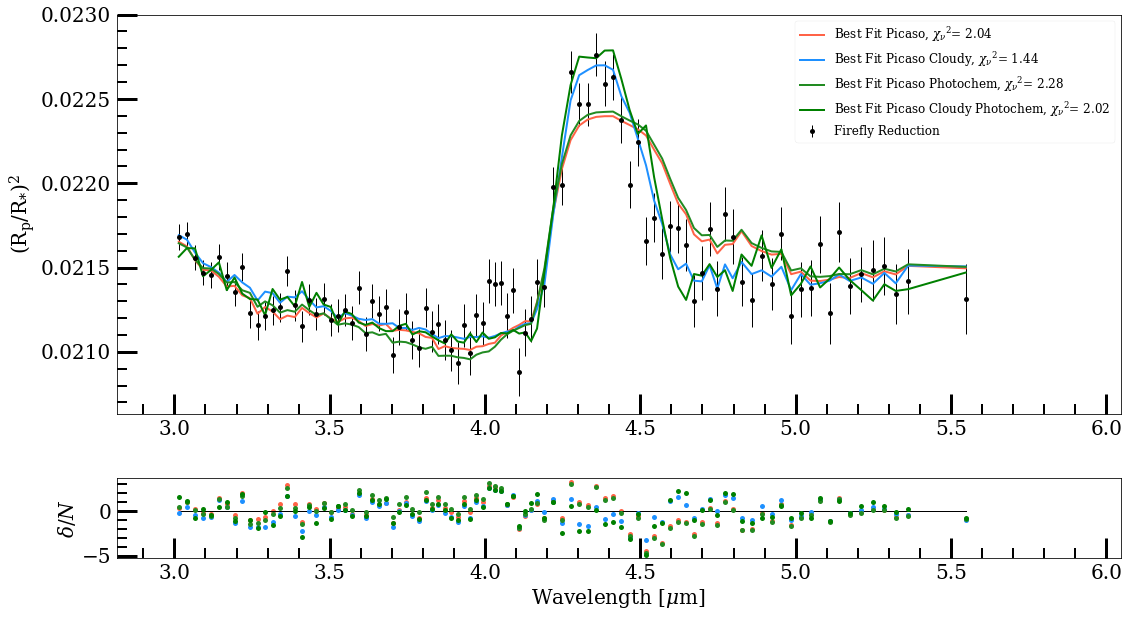

In [13]:
#location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/figures/Prism_allmodels_firefly.pdf"
fig1,ax1 = plot_best_fit(wlgrid_center,wlgrid_width,rprs_data2,e_rprs2,grid1="Picaso",spectra_bf_1= spectra_bf_pi,chi1 = chi_sq_pi[0], grid2="Picaso Cloudy", spectra_bf_2=spectra_bf_picld,chi2 = chi_sq_picld[0],grid3='Picaso Photochem', spectra_bf_3=spectra_bf_piph,chi3=chi_sq_piph[0],grid4='Picaso Cloudy Photochem', spectra_bf_4=spectra_bf_piphcld,chi4=chi_sq_piphcld[0],reduction_name=reduction_name)
plt.savefig("figures/"+reduction_name+"_spectra.pdf",bbox_inches='tight')

In [14]:
#np.savetxt("Cloudy_BF_Picaso.txt",np.transpose([wlgrid_center,spectra_bf_picld[0,:]]))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


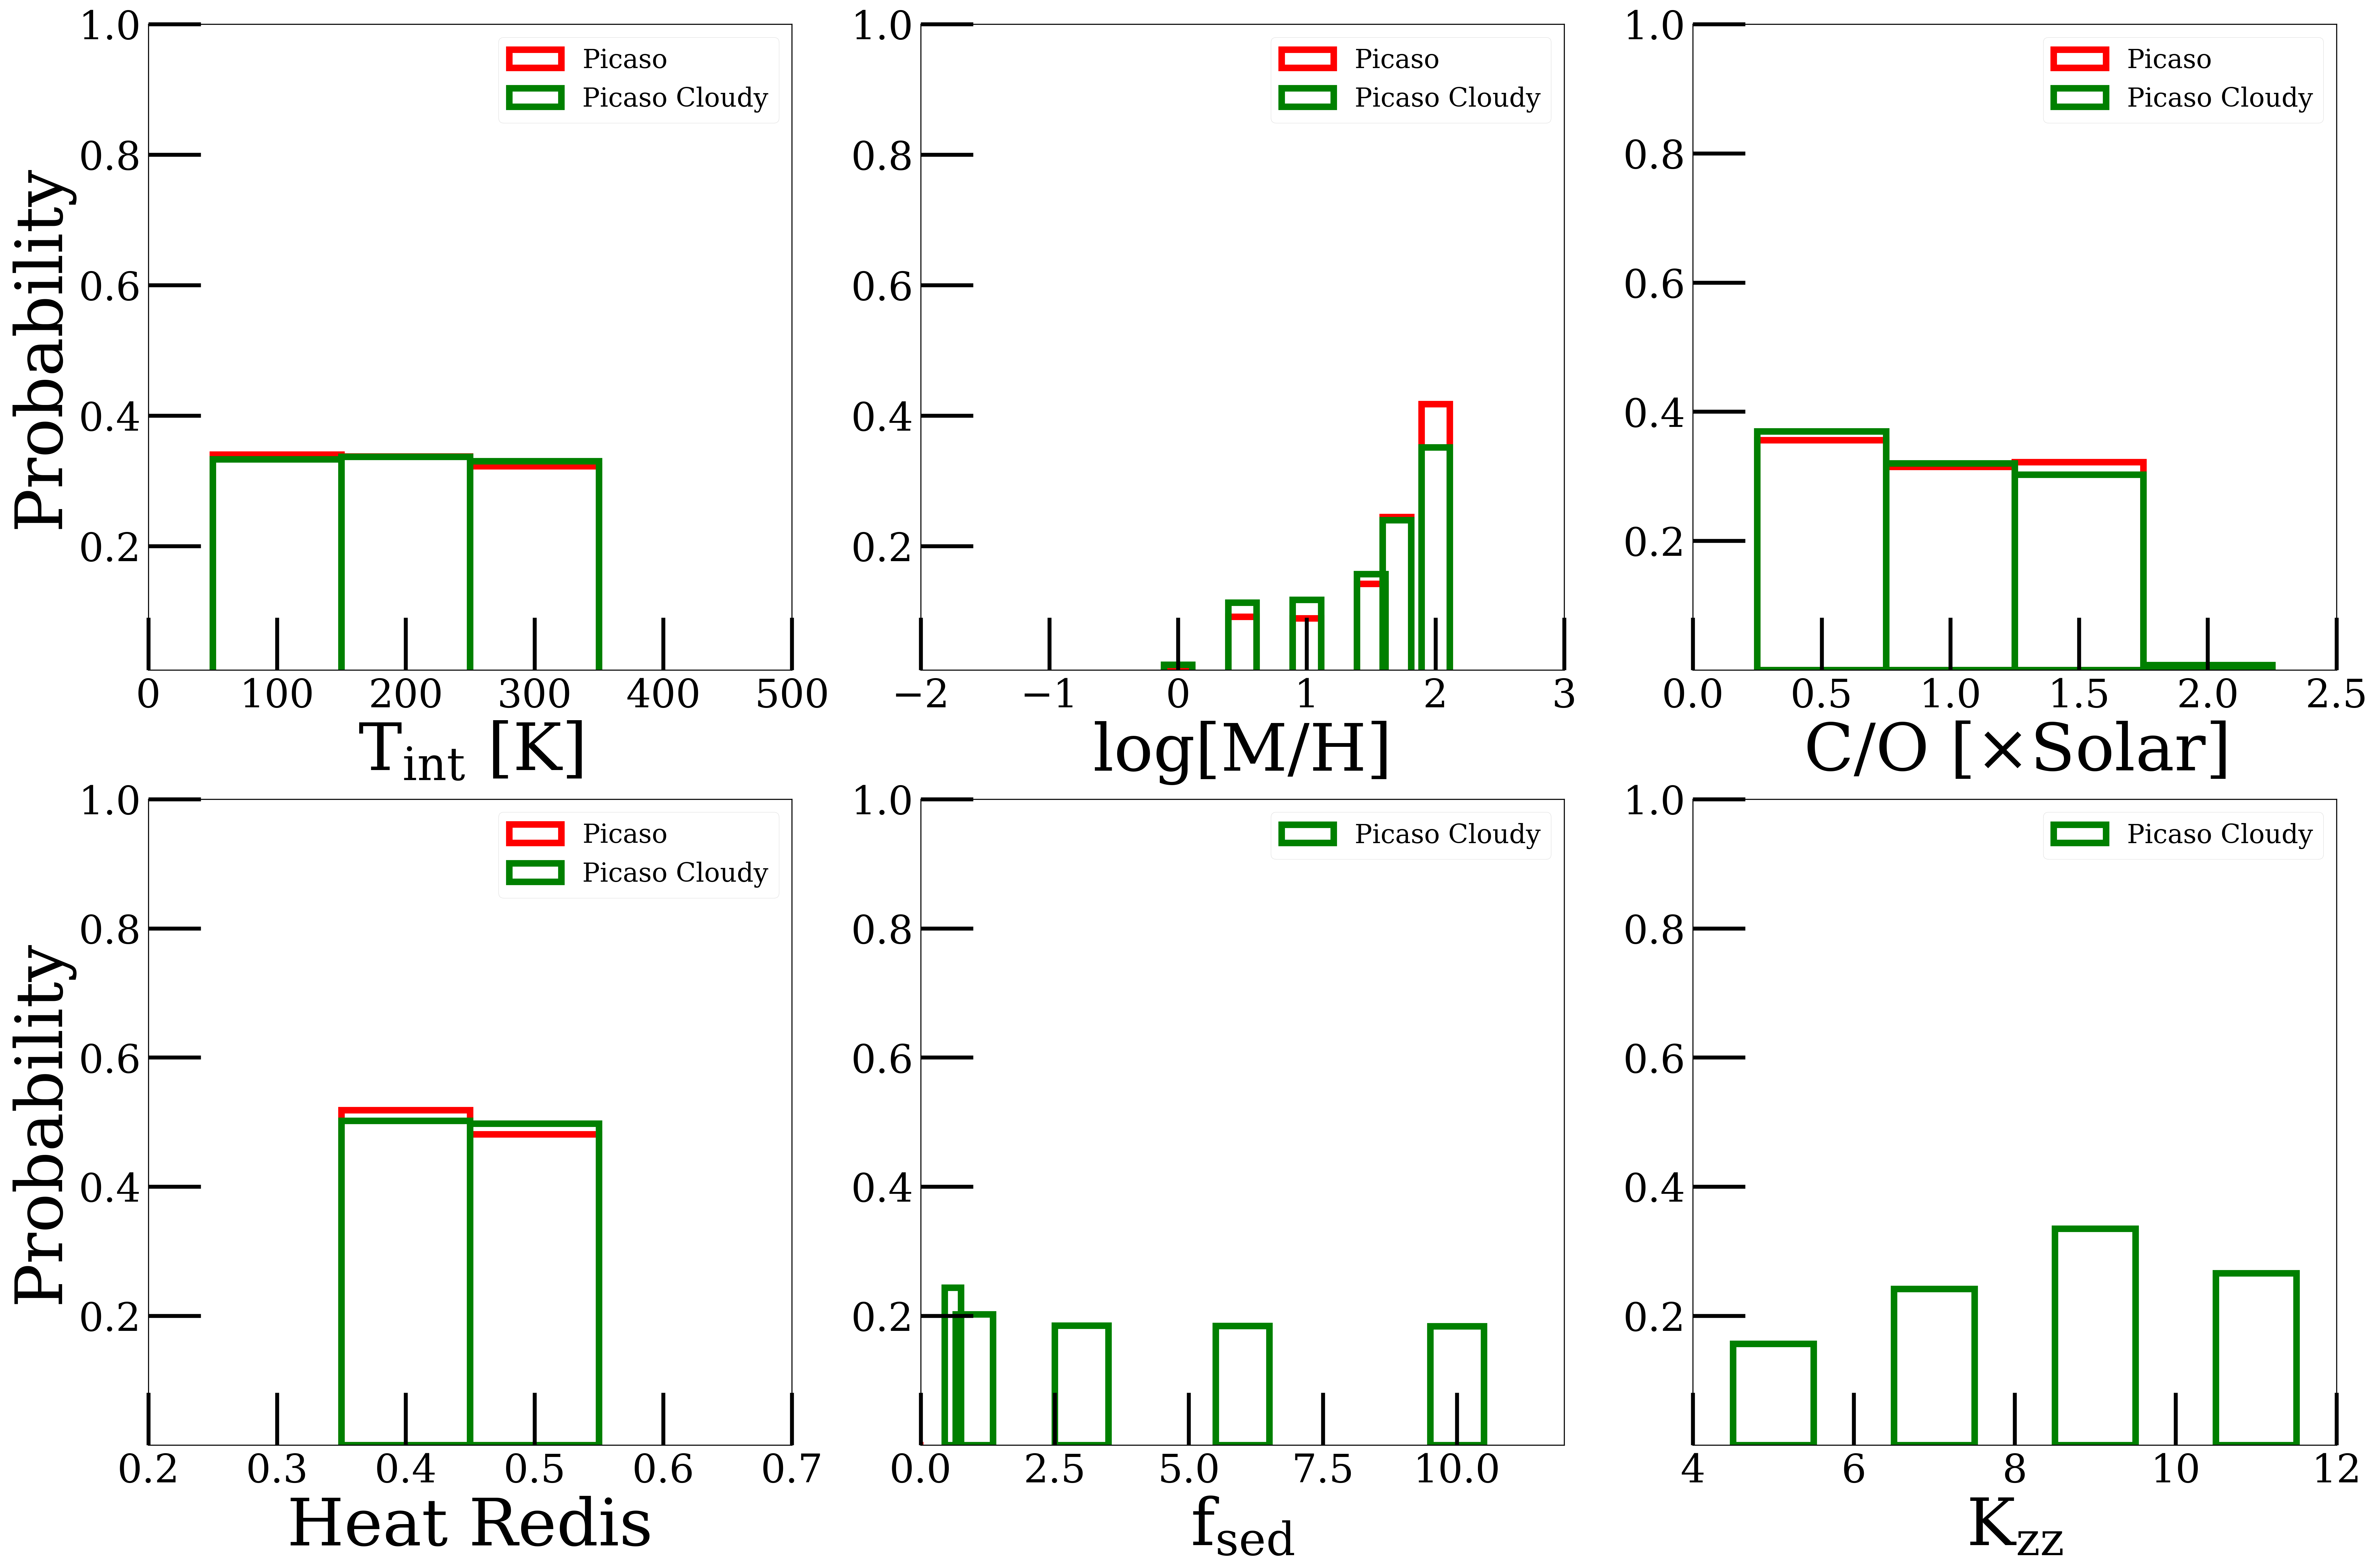

In [15]:
fig,ax = plot_posteriors(Tint_pi,mh_pi,cto_pi,heat_redis_pi,fsed_pi,logkzz_pi,chi_sq_pi,grid_name1="Picaso",color="red")
fig,ax = plot_posteriors(Tint_picld,mh_picld,cto_picld,heat_redis_picld,fsed_picld,logkzz_picld,chi_sq_picld,grid_name1="Picaso Cloudy",fig=fig,ax=ax,color="green")

plt.savefig("figures/"+reduction_name+"_posterior.pdf",bbox_inches='tight')

In [14]:
np.savetxt("Picaso_best_fit_cloudy_model.txt",np.transpose([wlgrid_center,spectra_bf_picld[0,:]]))

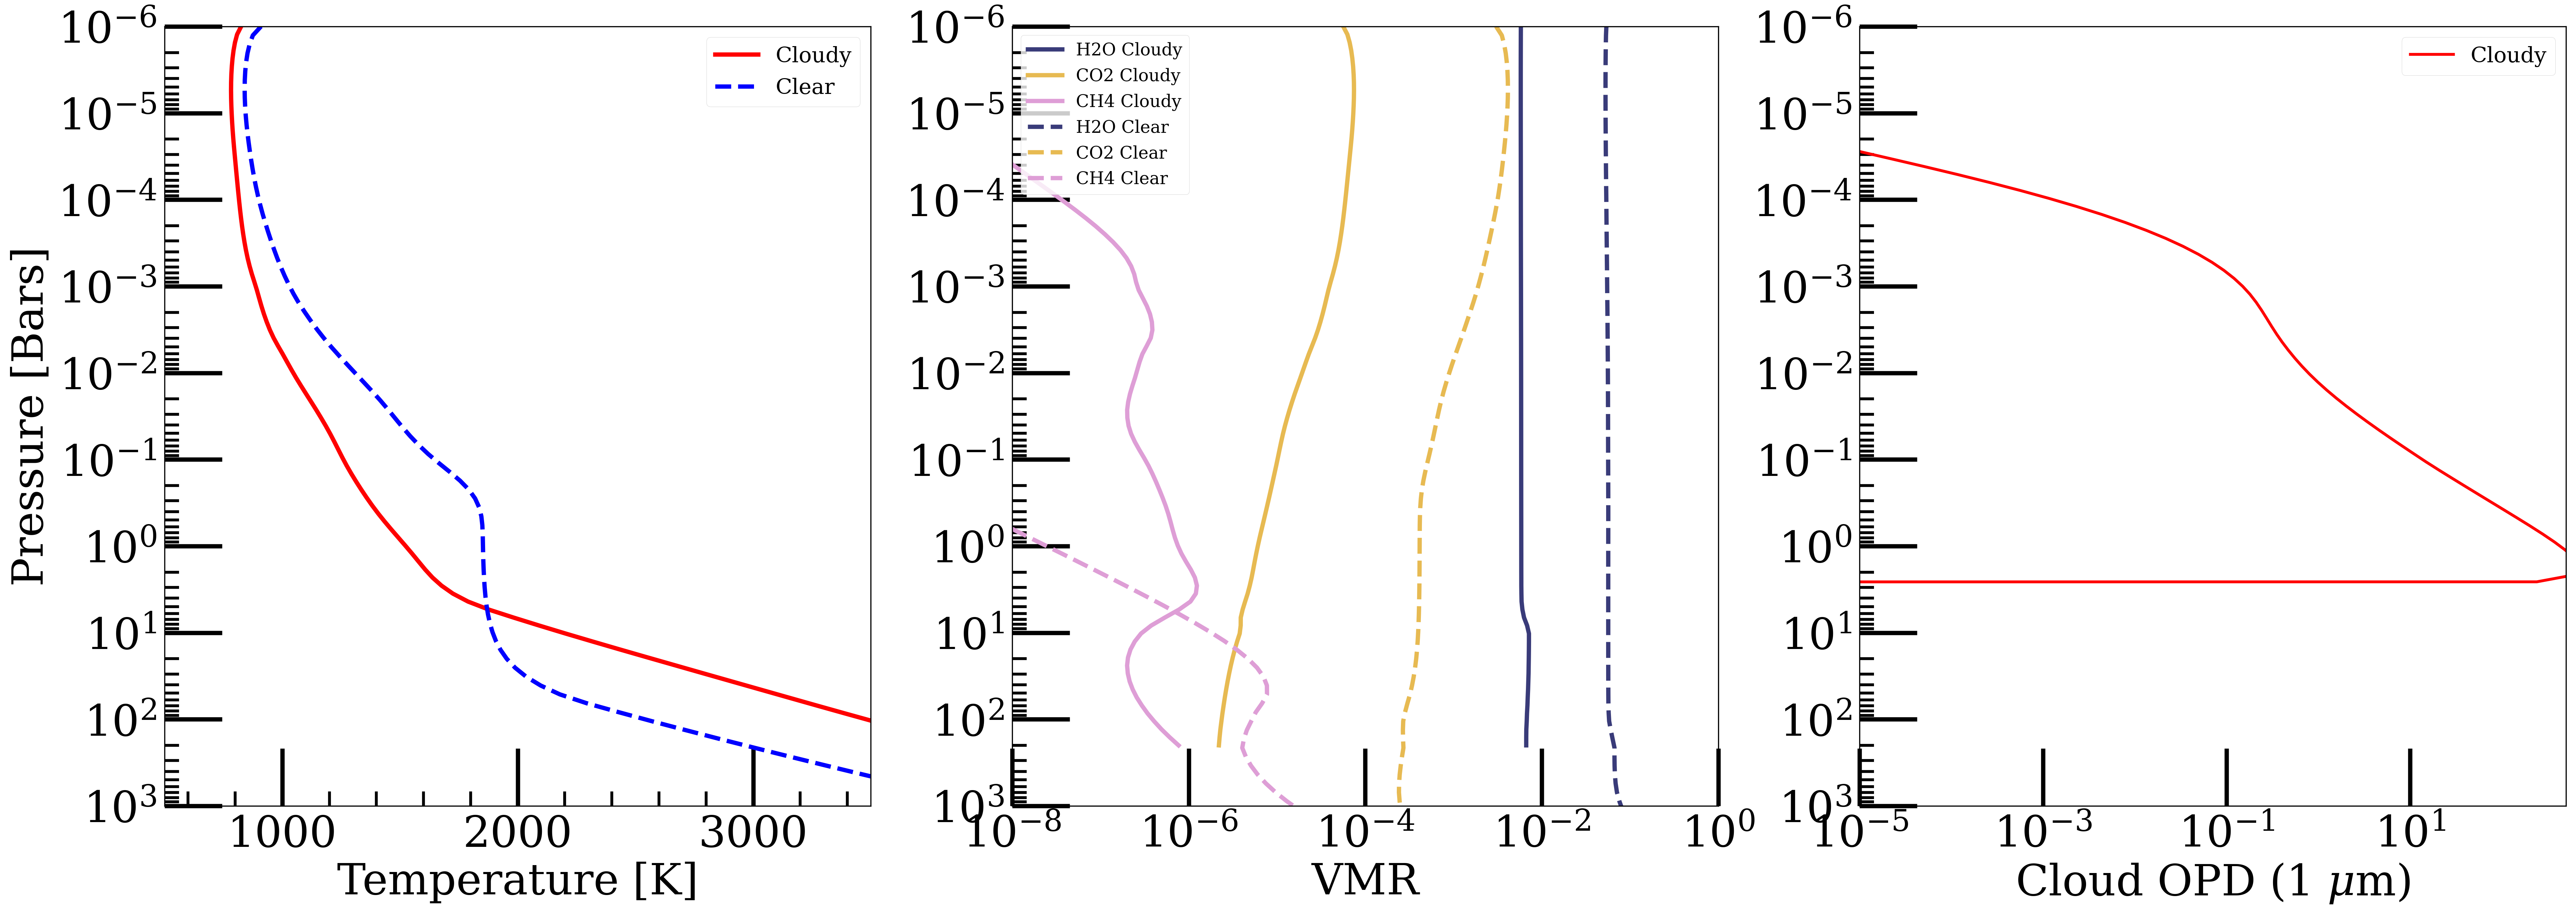

In [16]:
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cldy"

fig,ax = plot_atmosphere(location,filename_picld[0],gas_names=['H2O','CO2','CH4'],fig=None,ax=None,linestyle="solid",color="red",label="Cloudy")

location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cld_free"
fig,ax = plot_atmosphere(location,filename_pi[0],gas_names=['H2O','CO2','CH4'],fig=fig,ax=ax,linestyle="--",color="blue",label="Clear")




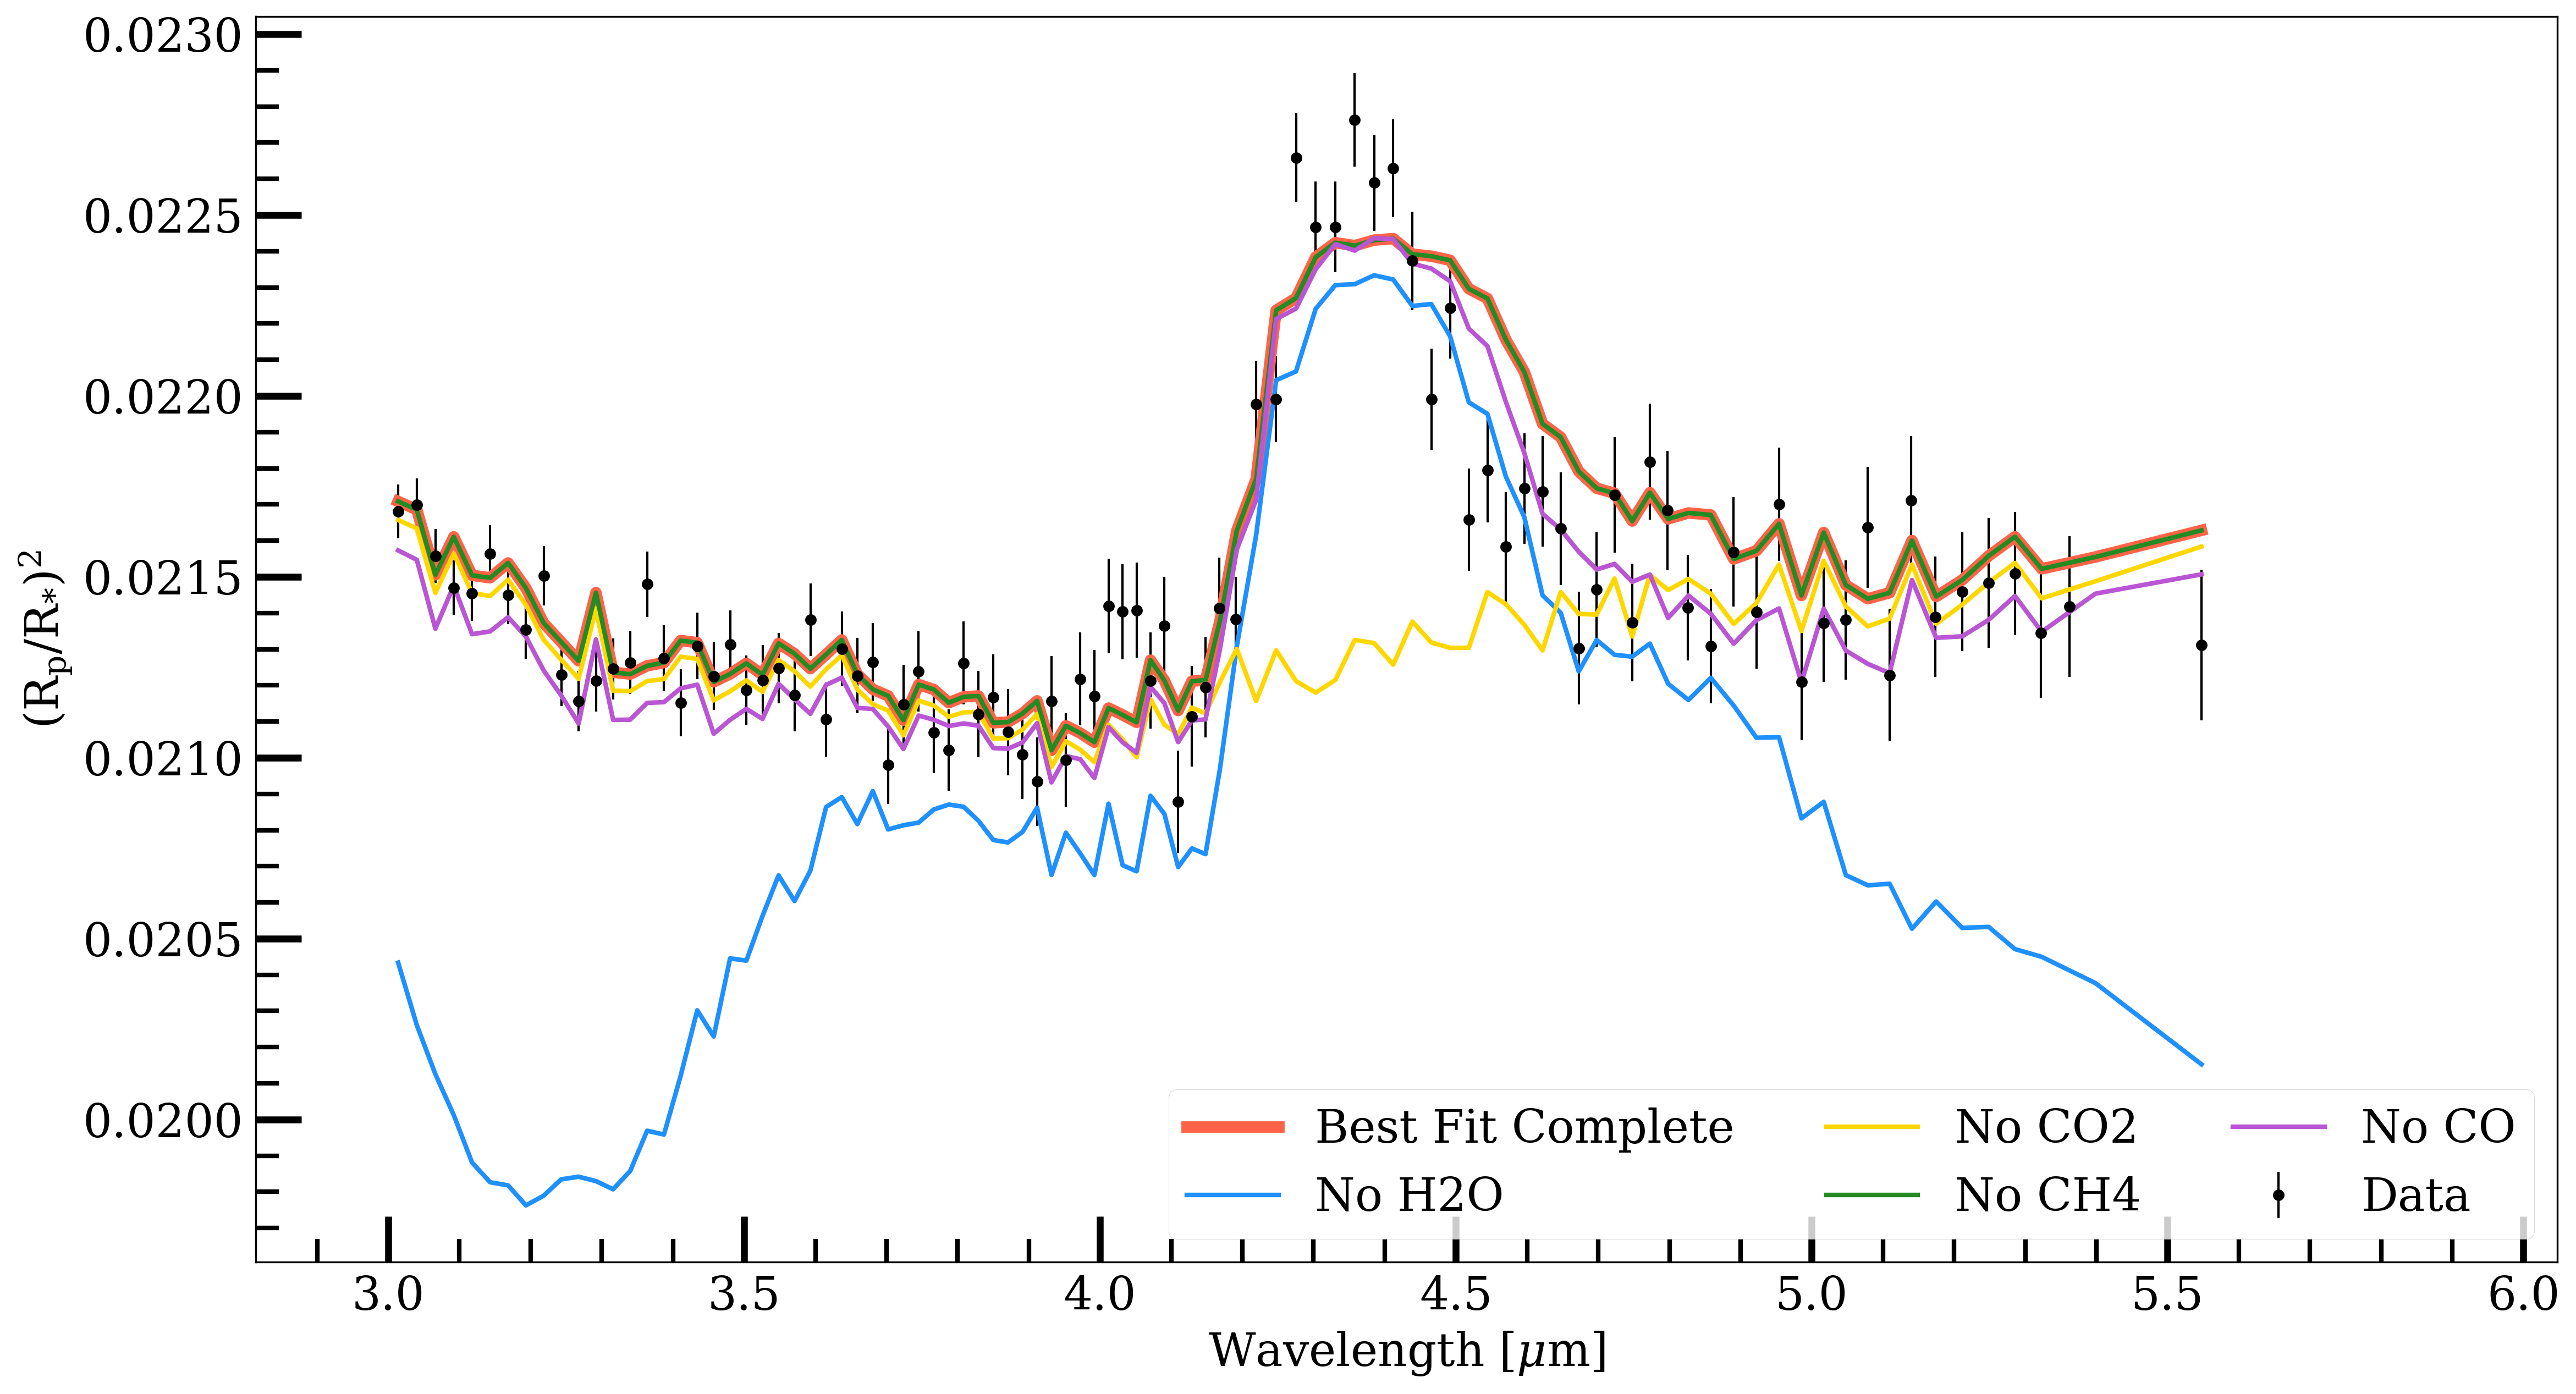

In [8]:
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cld_free"
opa = jdi.opannection(wave_range=[0.49,5.7])
mass,radius = 0.28,1.279
T_st,met_st,logg_st,radius_st = 5326.6,-0.03,4.38933,0.932


fig,ax = plot_contribution(mass,radius,T_st,met_st,logg_st,radius_st,opa,location,filename_pi[0],offset_pi[0],wlgrid_center,rprs_data2,e_rprs2,gas_contribution=['H2O','CO2','CH4','CO'],fig=None,ax=None)



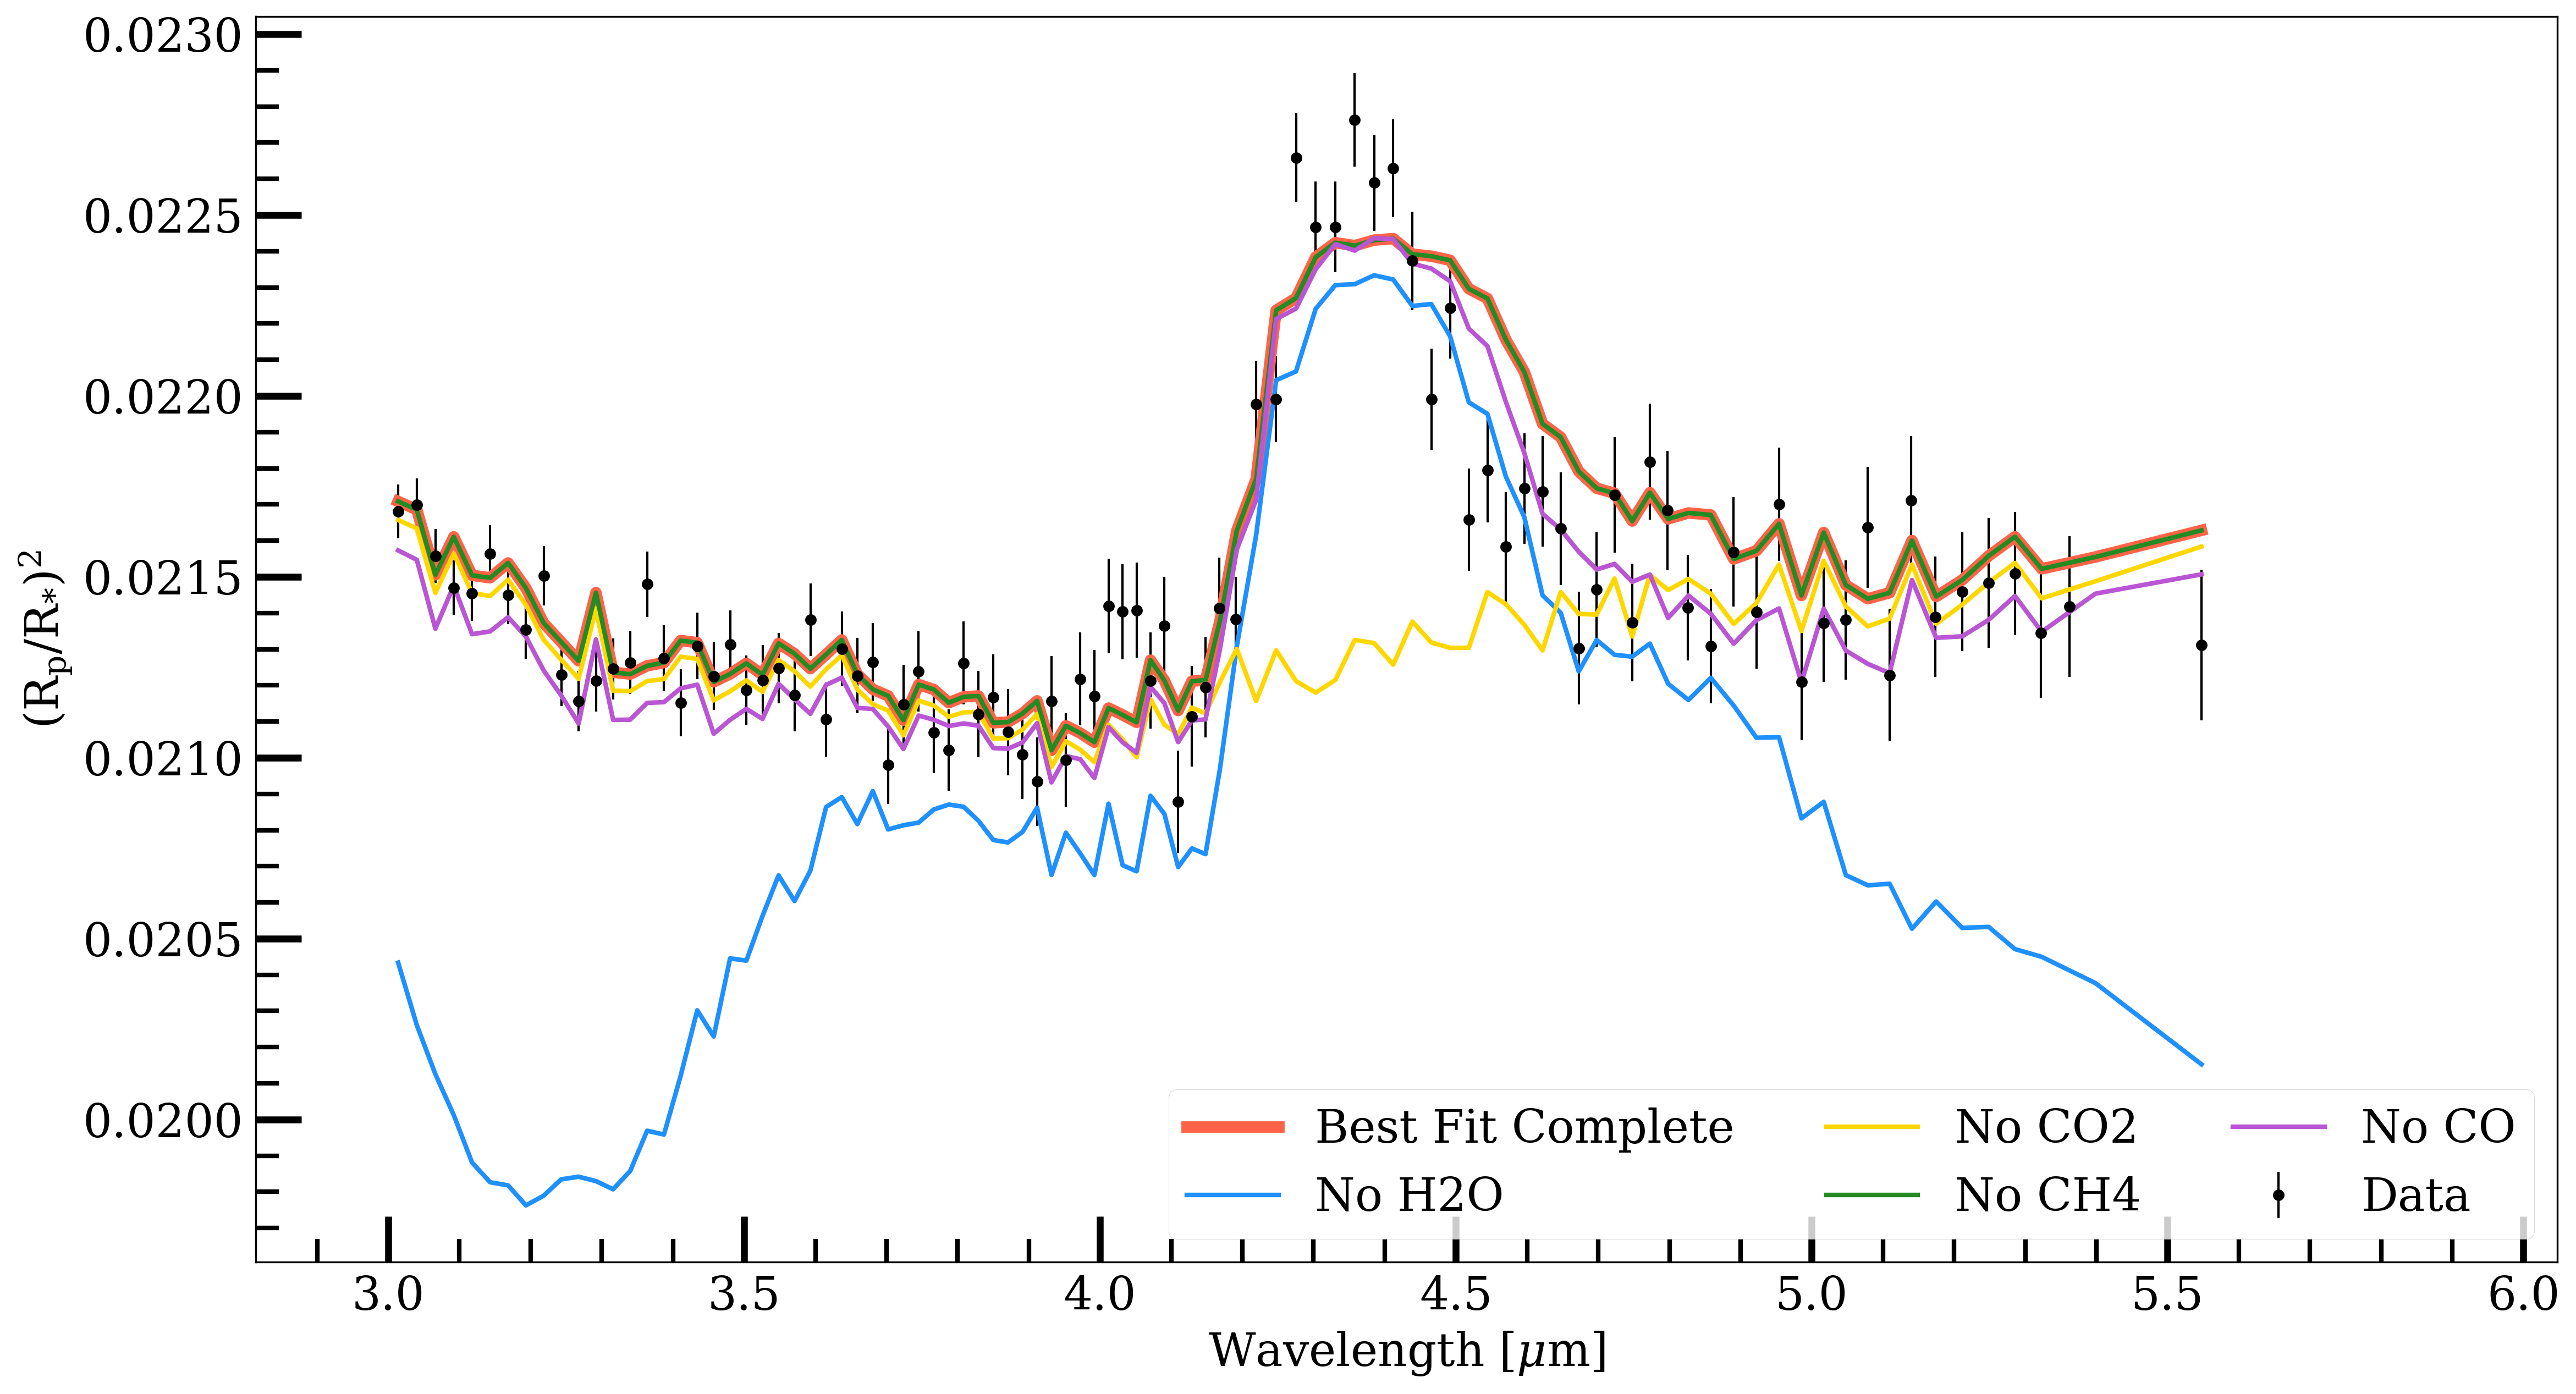

In [9]:
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cld_free"
opa = jdi.opannection(wave_range=[0.49,5.7])
mass,radius = 0.28,1.279
T_st,met_st,logg_st,radius_st = 5326.6,-0.03,4.38933,0.932


fig,ax = plot_contribution(mass,radius,T_st,met_st,logg_st,radius_st,opa,location,filename_pi[0],offset_pi[0],wlgrid_center,rprs_data2,e_rprs2,gas_contribution=['H2O','CO2','CH4','CO'],fig=None,ax=None)



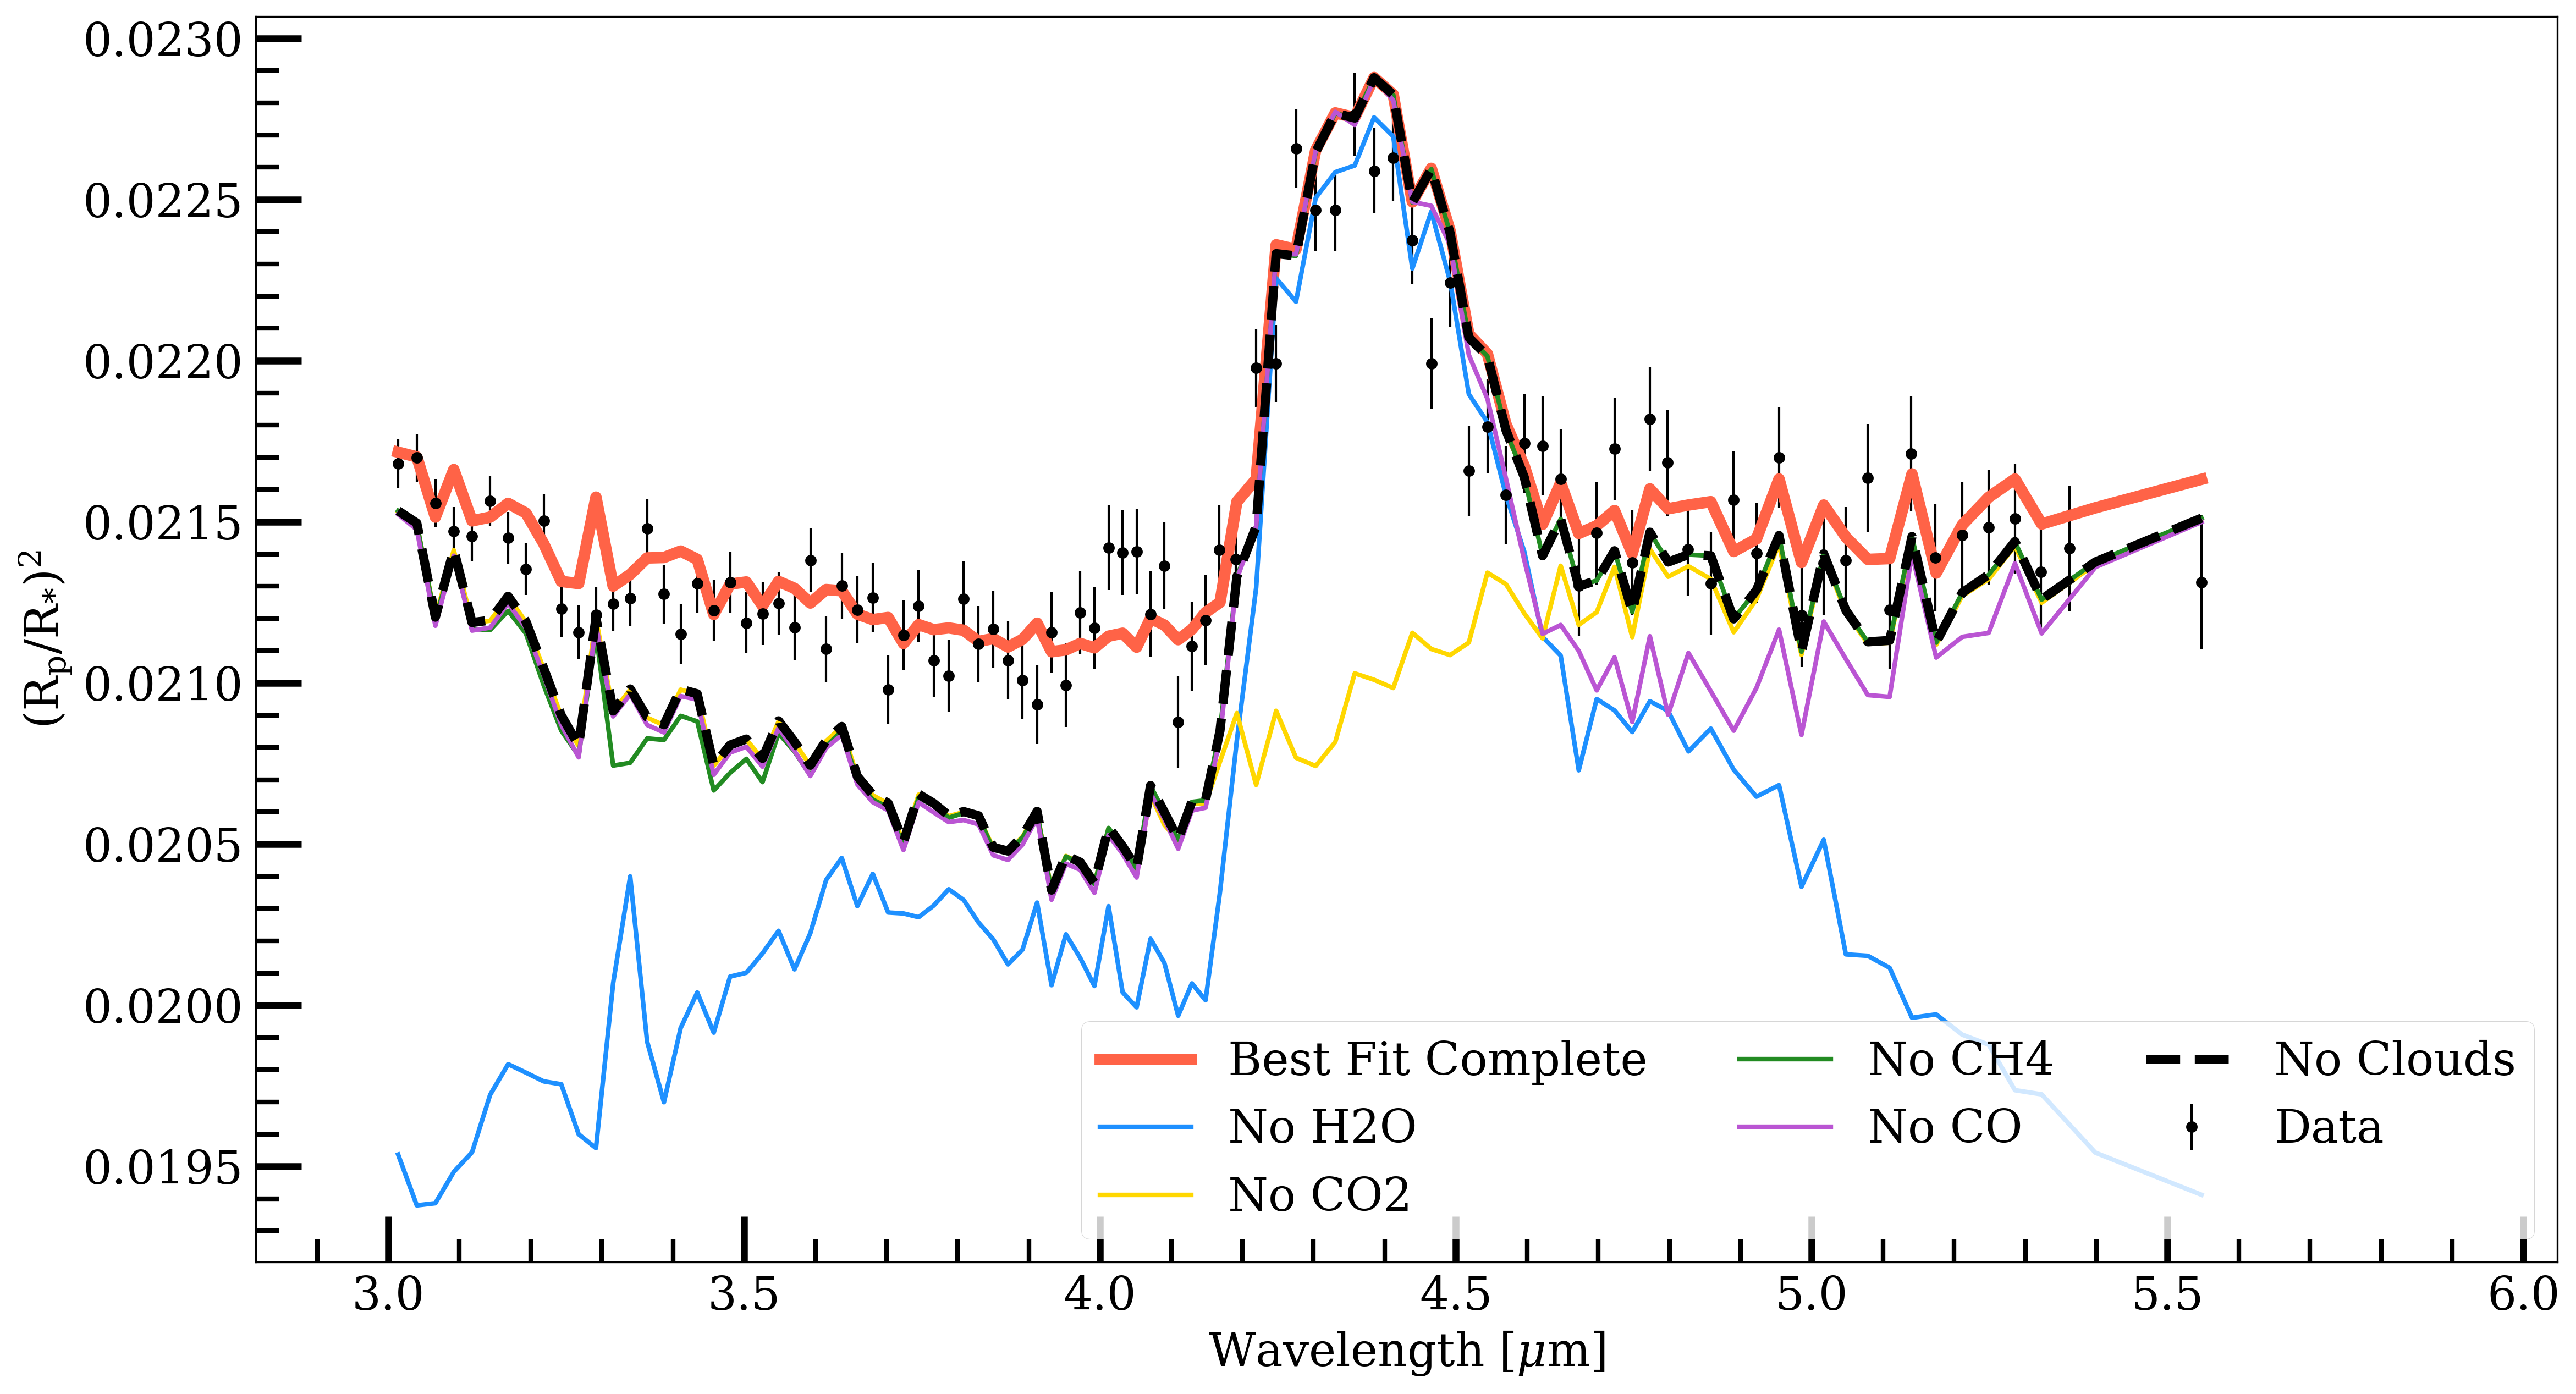

<Figure size 2100x1200 with 0 Axes>

In [19]:
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cldy"
opa = jdi.opannection(wave_range=[0.49,5.7])
mass,radius = 0.28,1.279
T_st,met_st,logg_st,radius_st = 5326.6,-0.03,4.38933,0.932


fig,ax = plot_contribution(mass,radius,T_st,met_st,logg_st,radius_st,opa,location,filename_picld[0],offset_cld[0],wlgrid_center,rprs_data2,e_rprs2,gas_contribution=['H2O','CO2','CH4','CO'],fig=None,ax=None)
plt.savefig("figures/"+reduction_name+"_contribution.pdf",bbox_inches='tight')


Turning off Raman for Non-H2 atmosphere
Turning off Raman for Non-H2 atmosphere
Turning off Raman for Non-H2 atmosphere
Turning off Raman for Non-H2 atmosphere
Turning off Raman for Non-H2 atmosphere


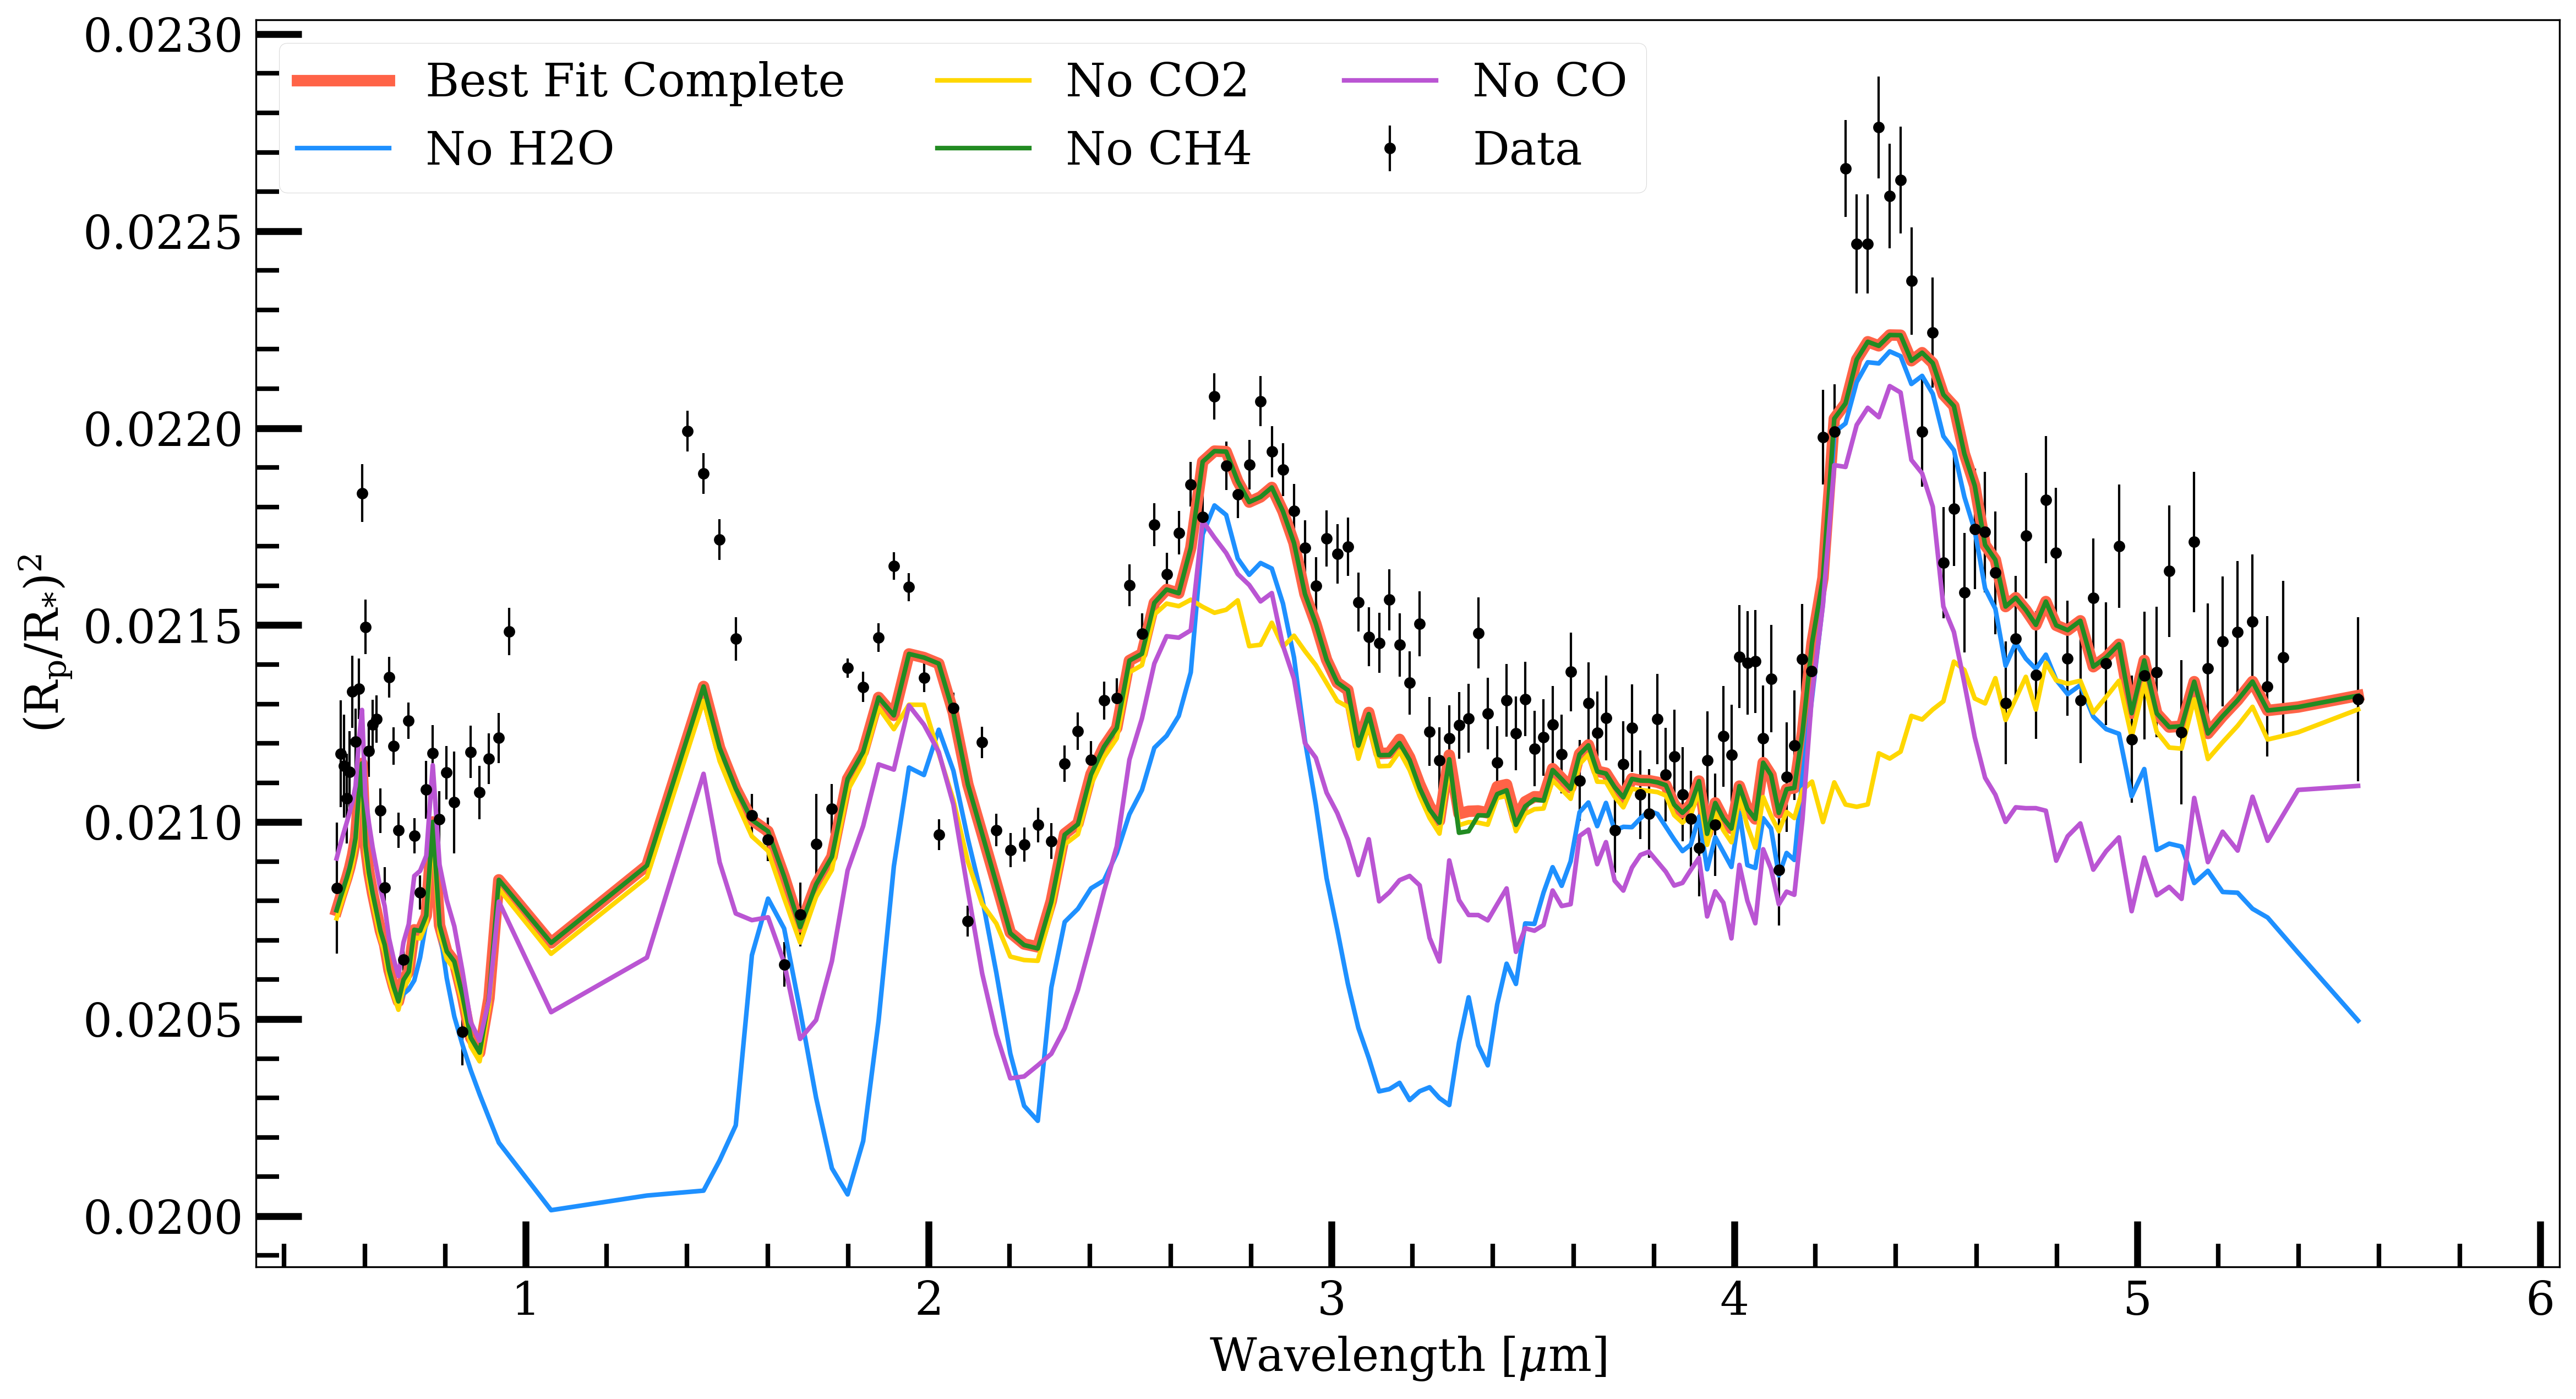

In [12]:
location = "/Users/sagnickmukherjee/Documents/research/geers/wasp39b/cld_free_photo"
opa = jdi.opannection(wave_range=[0.49,5.7])
mass,radius = 0.28,1.279
T_st,met_st,logg_st,radius_st = 5326.6,-0.03,4.38933,0.932


fig,ax = plot_contribution(mass,radius,T_st,met_st,logg_st,radius_st,opa,location,filename_piph[0],offset_piph[0],wlgrid_center,rprs_data2,e_rprs2,gas_contribution=['H2O','CO2','CH4','CO'],fig=None,ax=None)

